In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

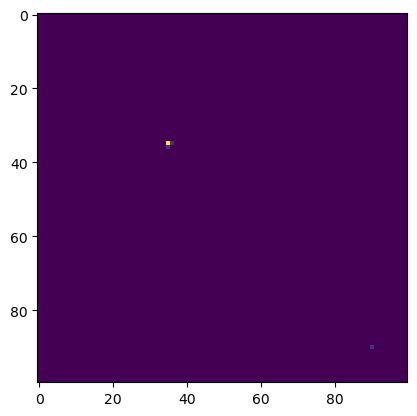

In [25]:
X = np.zeros((100,100))
X[35,35] = 7
X[35,36] = 1
X[36,35] = 1
X[90,90] = 1
plt.imshow(X)
Xog = X.copy()

100%|██████████| 1000/1000 [00:12<00:00, 77.60it/s]


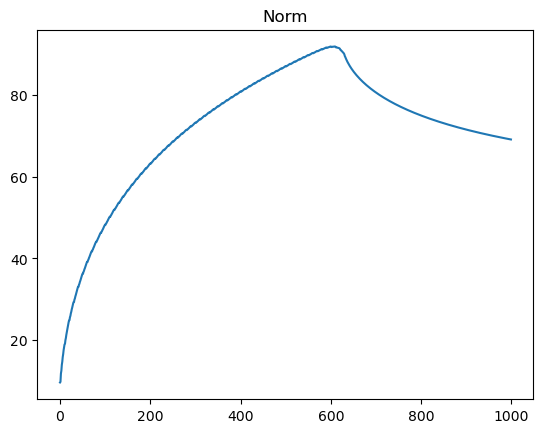

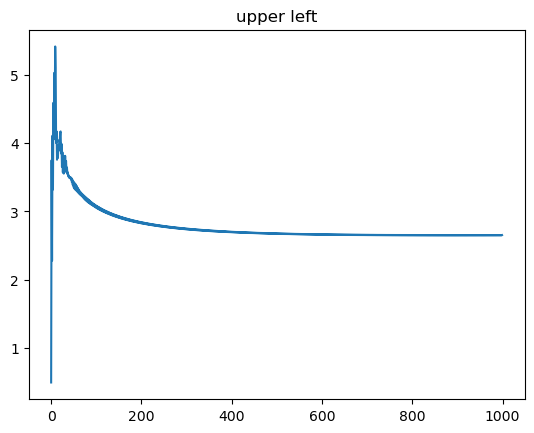

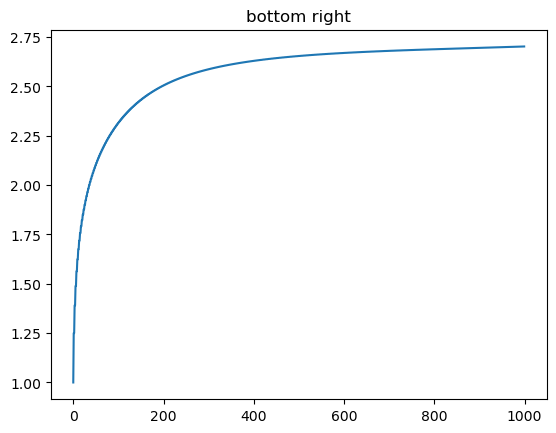

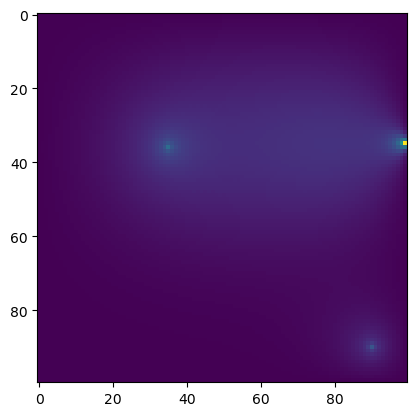

In [26]:
points = 1000
graphs = np.zeros((points,3))
m, n = X.shape
pos = 35

for k in tqdm(range(points)):
  if k % 10 == 0 and pos<99:
    pos += 1
    Xog[35,pos] = Xog[35,pos-1]
    Xog[35,pos-1] = Xog[35,pos-2]
  Y = X.copy()
  for i in range(m):
    for j in range(n):
      temp = 0
      if i+1<m:
        temp += X[i+1,j]
      if j+1<n:
        temp += X[i,j+1]
      if i-1>=0:
        temp += X[i-1,j]
      if j-1>=0:
        temp += X[i,j-1]
      Y[i,j] = temp/4+Xog[i,j]
  X = Y.copy()
  graphs[k,:] = np.linalg.norm(Y), Y[35,35], Y[90,90]

grid = list(range(points))

plt.plot(grid,graphs[:,0])
plt.title('Norm')
plt.show()

plt.plot(grid,graphs[:,1])
plt.title('upper left')
plt.show()

plt.plot(grid,graphs[:,2])
plt.title('bottom right')
plt.show()

plt.imshow(Y)
plt.show()

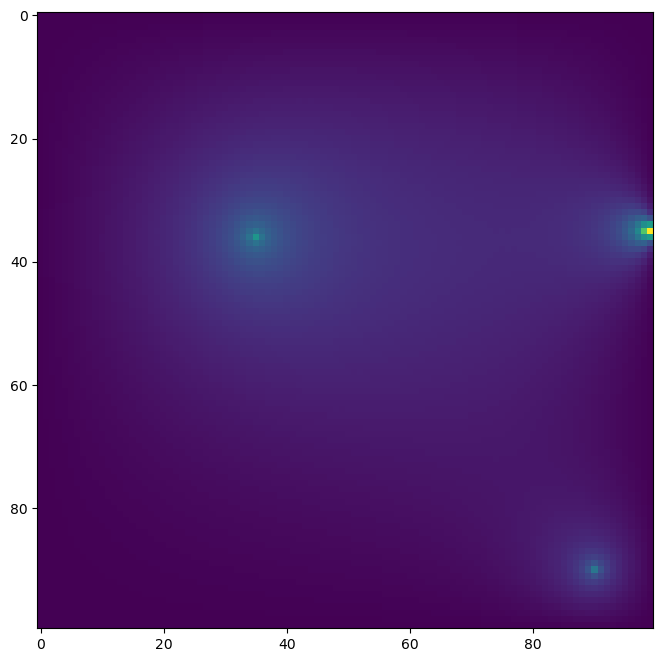

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

class simu(object):
  def __init__(self) -> None:
    self.X = np.zeros((100,100))
    self.X[35,35] = 7
    self.X[35,36] = 1
    self.X[36,35] = 1
    self.X[90,90] = 1
    self.Xog = self.X.copy()
    self.pos = 35

    self.im = ax.imshow(self.X)
    
  def animateStep(self, frame):
    print(frame, end='\r')
    if frame % 10 == 0 and self.pos<99:
      self.pos += 1
      self.Xog[35,self.pos] = self.Xog[35,self.pos-1]
      self.Xog[35,self.pos-1] = self.Xog[35,self.pos-2]

    self.Y = self.X.copy()
    m, n = self.X.shape
    for i in range(m):
      for j in range(n):
        temp = 0
        if i+1<m:
          temp += self.X[i+1,j]
        if j+1<n:
          temp += self.X[i,j+1]
        if i-1>=0:
          temp += self.X[i-1,j]
        if j-1>=0:
          temp += self.X[i,j-1]
        self.Y[i,j] = temp/4+self.Xog[i,j]
    self.X = self.Y.copy()

    #ax.clear
    #ax.contourf(np.flip(self.Y,axis=0))
    self.im.set_data(self.Y)

nSeconds = 10
frames = 2000
interval = nSeconds*1000/frames
fps = frames/nSeconds

classinst = simu()
anim = animation.FuncAnimation(
  fig,
  classinst.animateStep,
  frames = frames,
  interval = interval
)

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
